In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import numpy as np
import random
plt.rcParams['figure.figsize'] = [4,3]
plt.rcParams['figure.dpi'] = 600
#plt.style.use('default')

In [ ]:
def isling_setup(M):
 
 list1=[1,-1]
 config=np.random.choice(list1,(M,M))
 
 return config

def check_bc(a,b,M):
  if a in range(1,M-1) and b in range(1,M-1):
    check=True
  else:
    check=False

  return check

def correct_bc(locations,M):
 for i in range(8):
   if locations[i]==-1:
     locations[i]=M-1
   if locations[i]==M:
     locations[i]=0

 return locations

def isling_print_config(config):
  plt.contourf(config, levels=[-2,0,2],colors=['#000000','#FFFFFF'],extend="neither")

def isling_calc(steps,M,Temp,spin):
  J=1
  k_b=1

  for k in range(steps):
   (x,y)=np.random.randint(M,size=2)
   positions=[x,y+1,x+1,y,x,y-1,x-1,y]

   check=check_bc(x,y,M)

   if check==False:
    positions=correct_bc(positions,M)
   i=0
   S=0
   Delta_E=0.0
   for i in range(4):
    S=S+spin[positions[2*i]][positions[2*i+1]]
   Delta_E=2*J*S*spin[x][y] 
   p=np.random.rand(1)
   if Delta_E<0 or np.exp(-Delta_E/(k_b*Temp))>p:
    spin[x][y]=-1*spin[x][y]
  return spin


In [ ]:
N=16
spin_config=isling_setup(N)


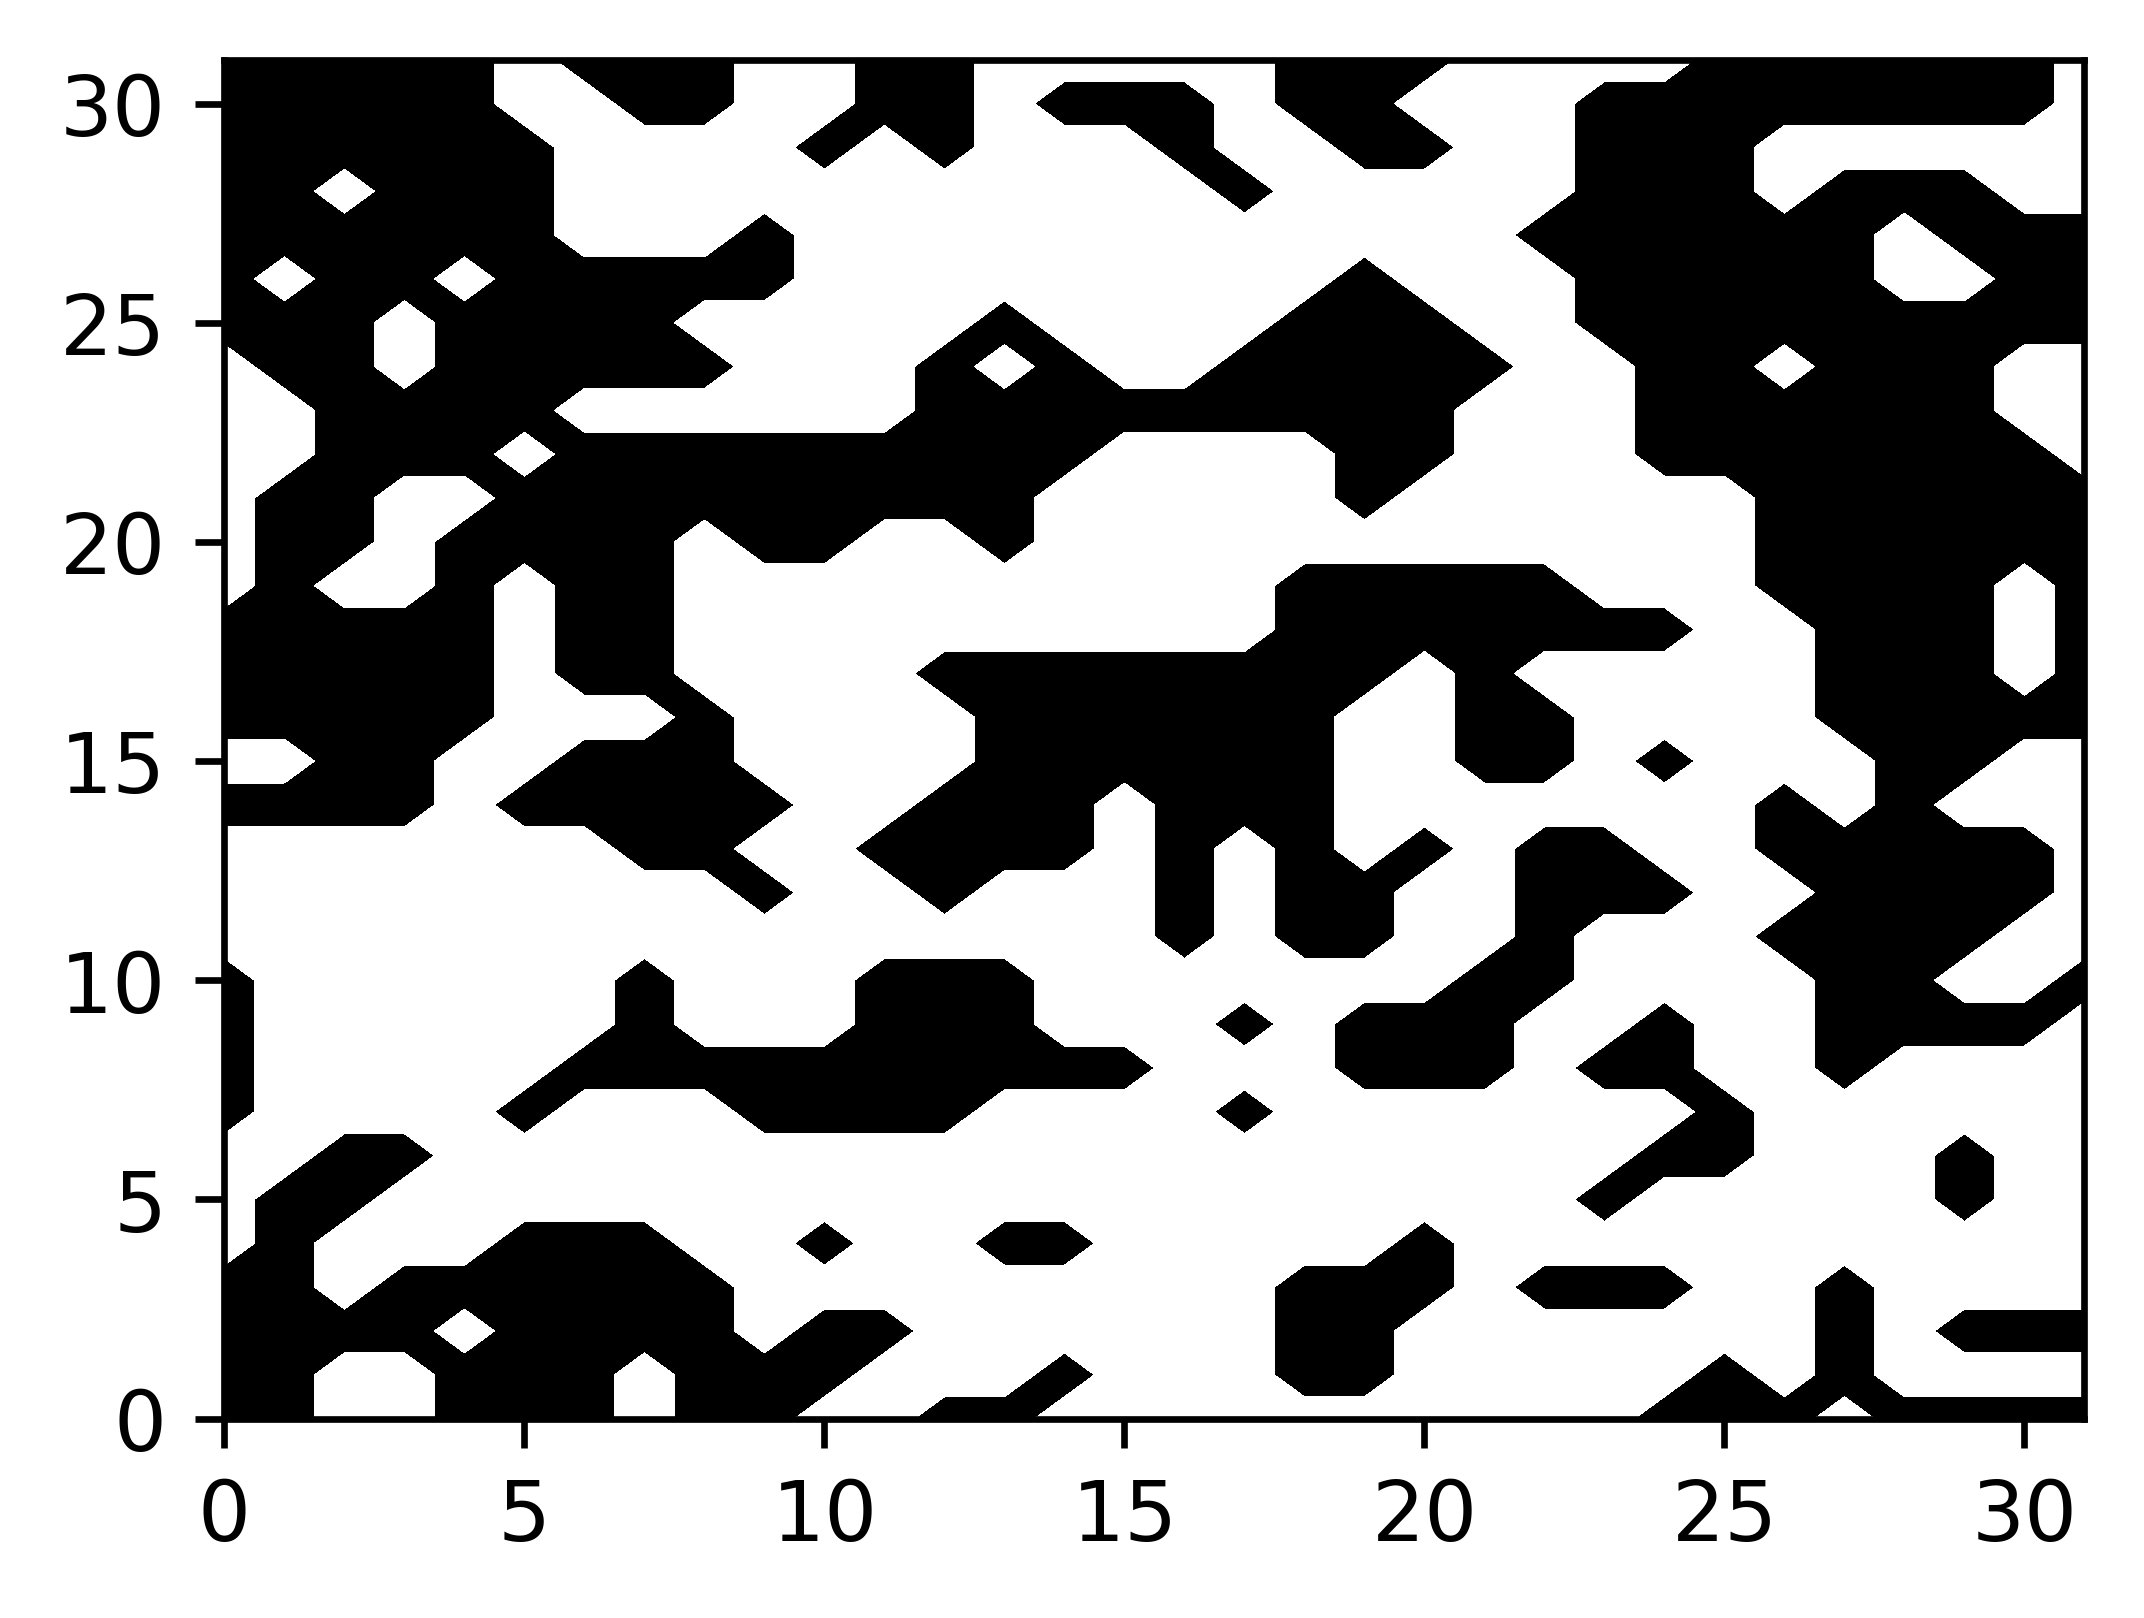

In [9]:


N=32
spin_config=isling_setup(N)

T=1

m=np.zeros(1000)

i=0


for i in range(1000):
 
 spin_config=isling_calc(1,N,T,spin_config)
 m[i]=np.mean(spin_config)


#z=np.linspace(1,1000,1000)
#plt.plot(z,np.abs(m));
#plt.plot(z,1-np.exp(-z/70))
isling_print_config(spin_config)


Text(0.5, 1.0, 'Heat capacity total execution time')

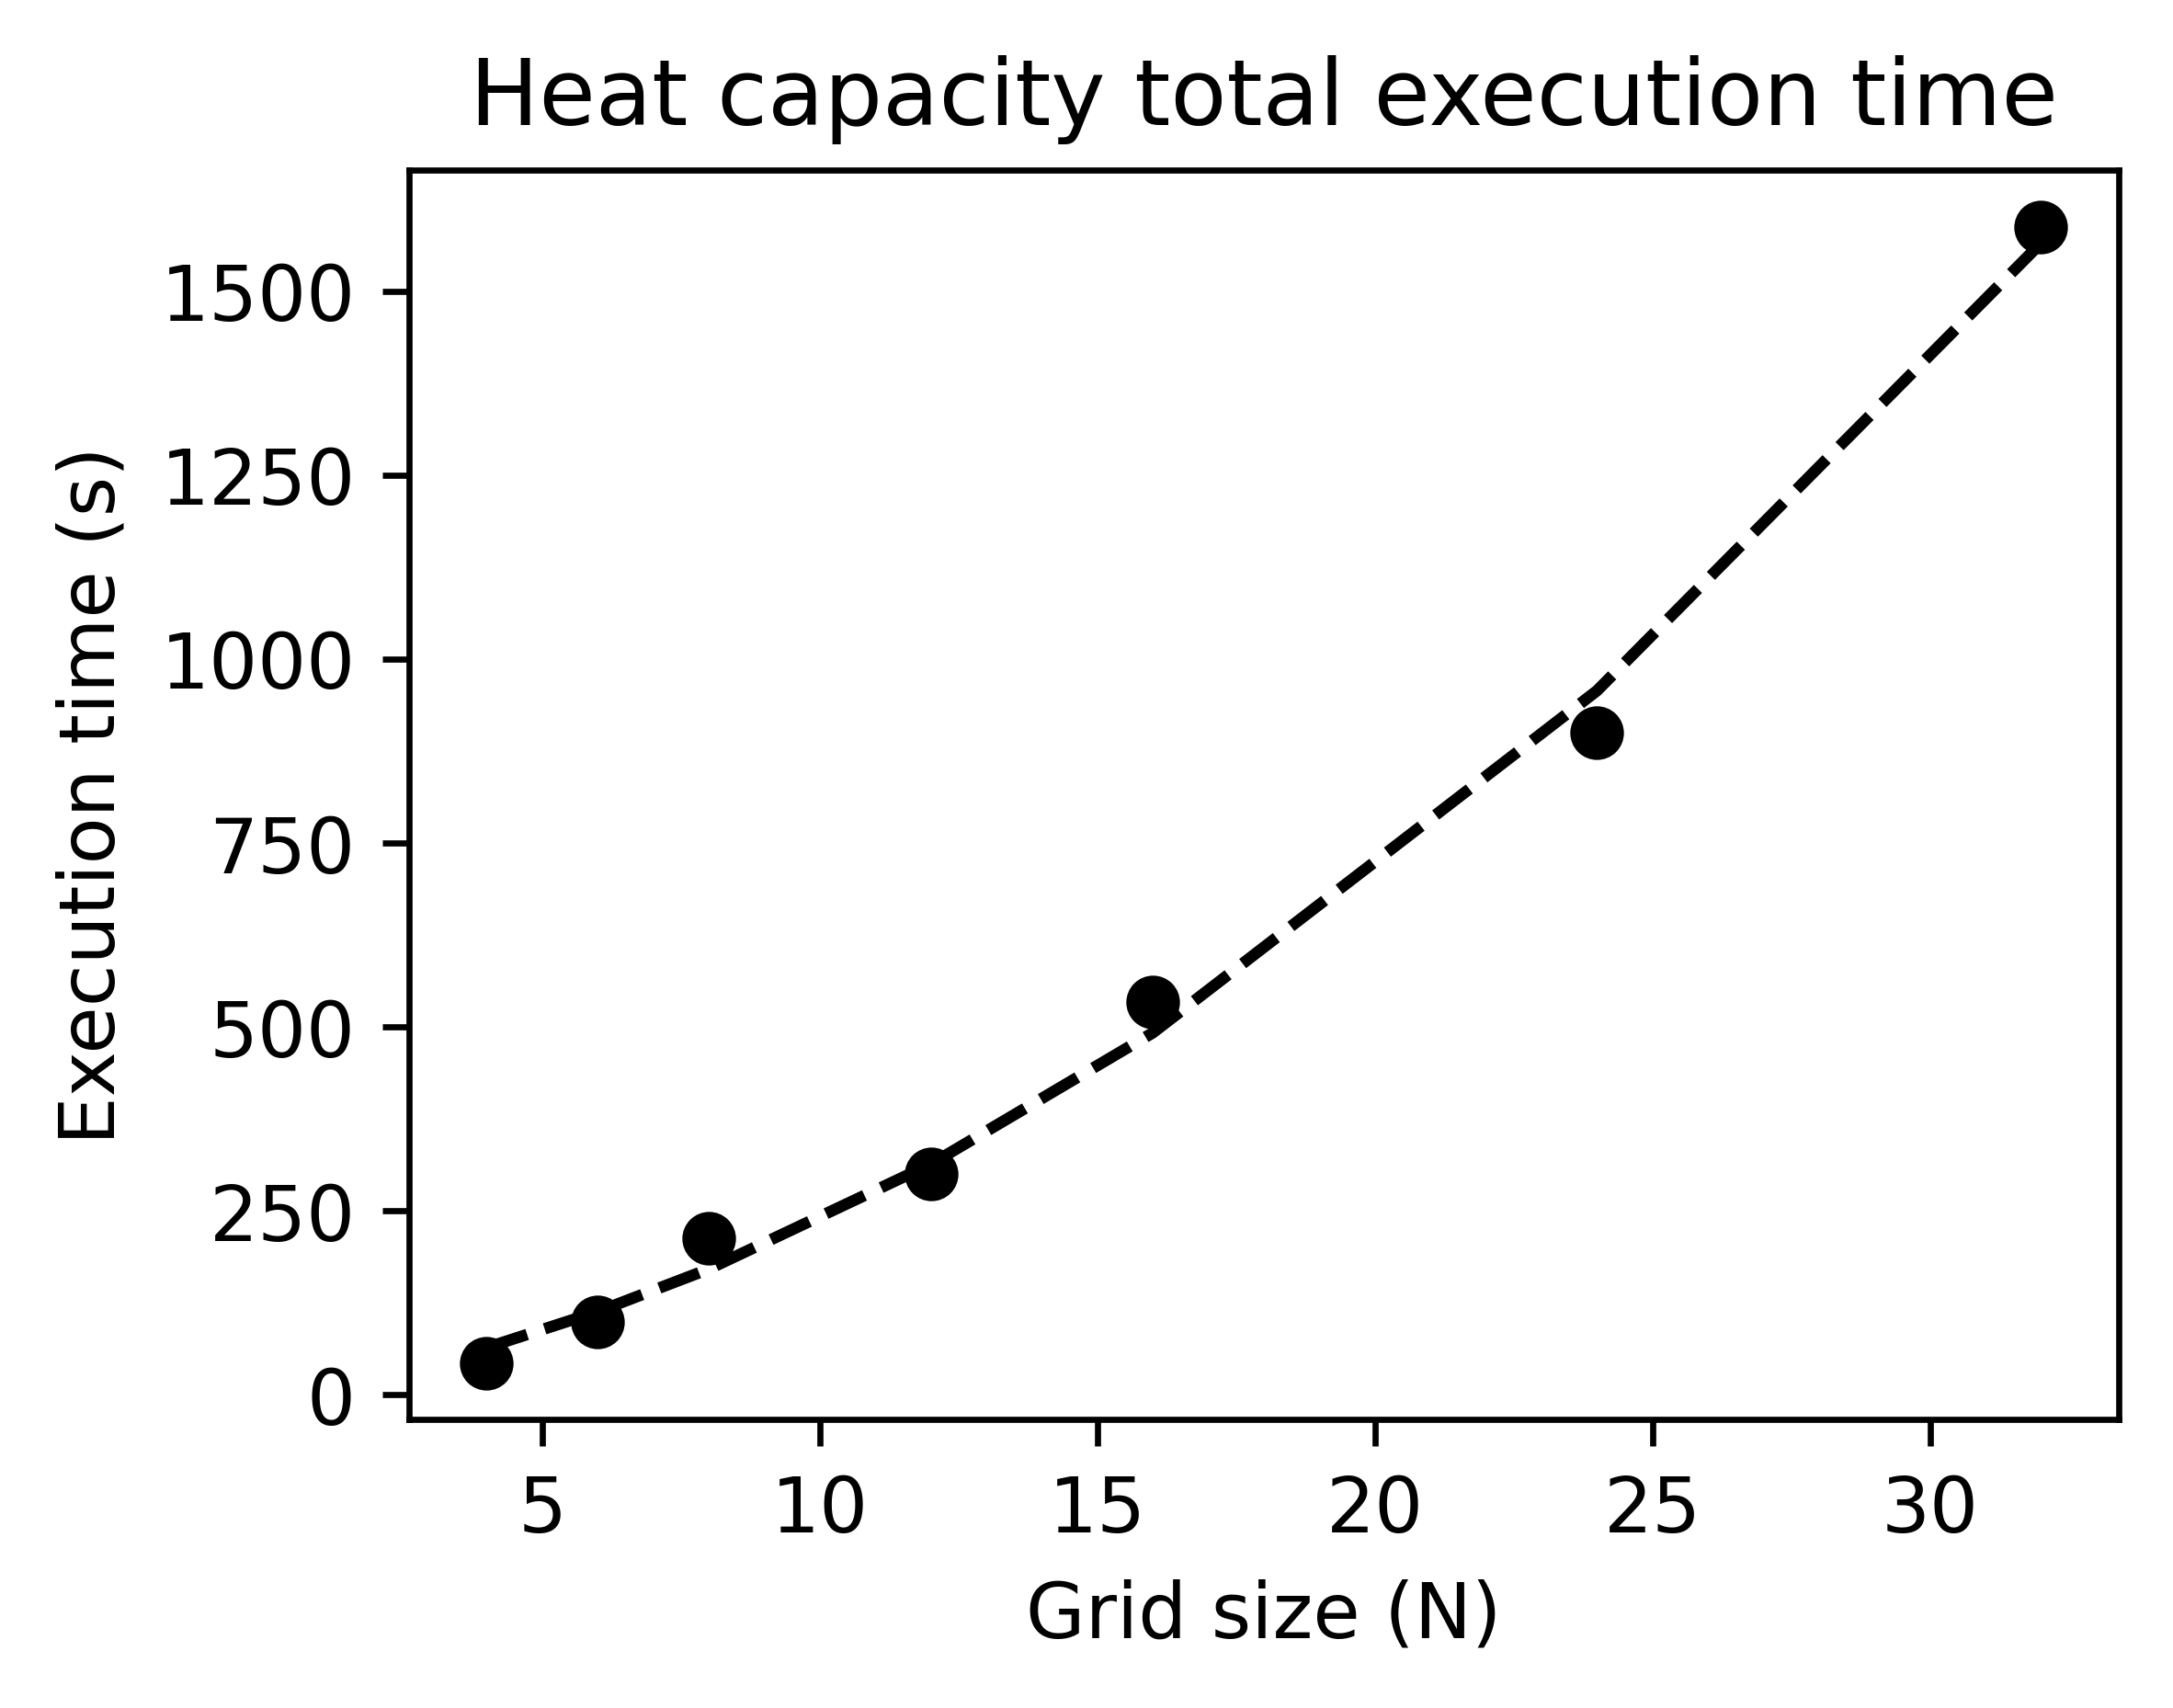

In [ ]:
x=np.array([4,6,8,12,16,24,32])
y=[43,99,212,300,533,900,1587]

plt.plot(x,y,'o',color='k')
plt.plot(x,1.1225*x**2+13.215*x-7.0374,'--k')
plt.xlabel("Grid size (N)")
plt.ylabel("Execution time (s)")
plt.title("Heat capacity total execution time")

Text(0.5, 1.0, 'Equilibrium time λ')

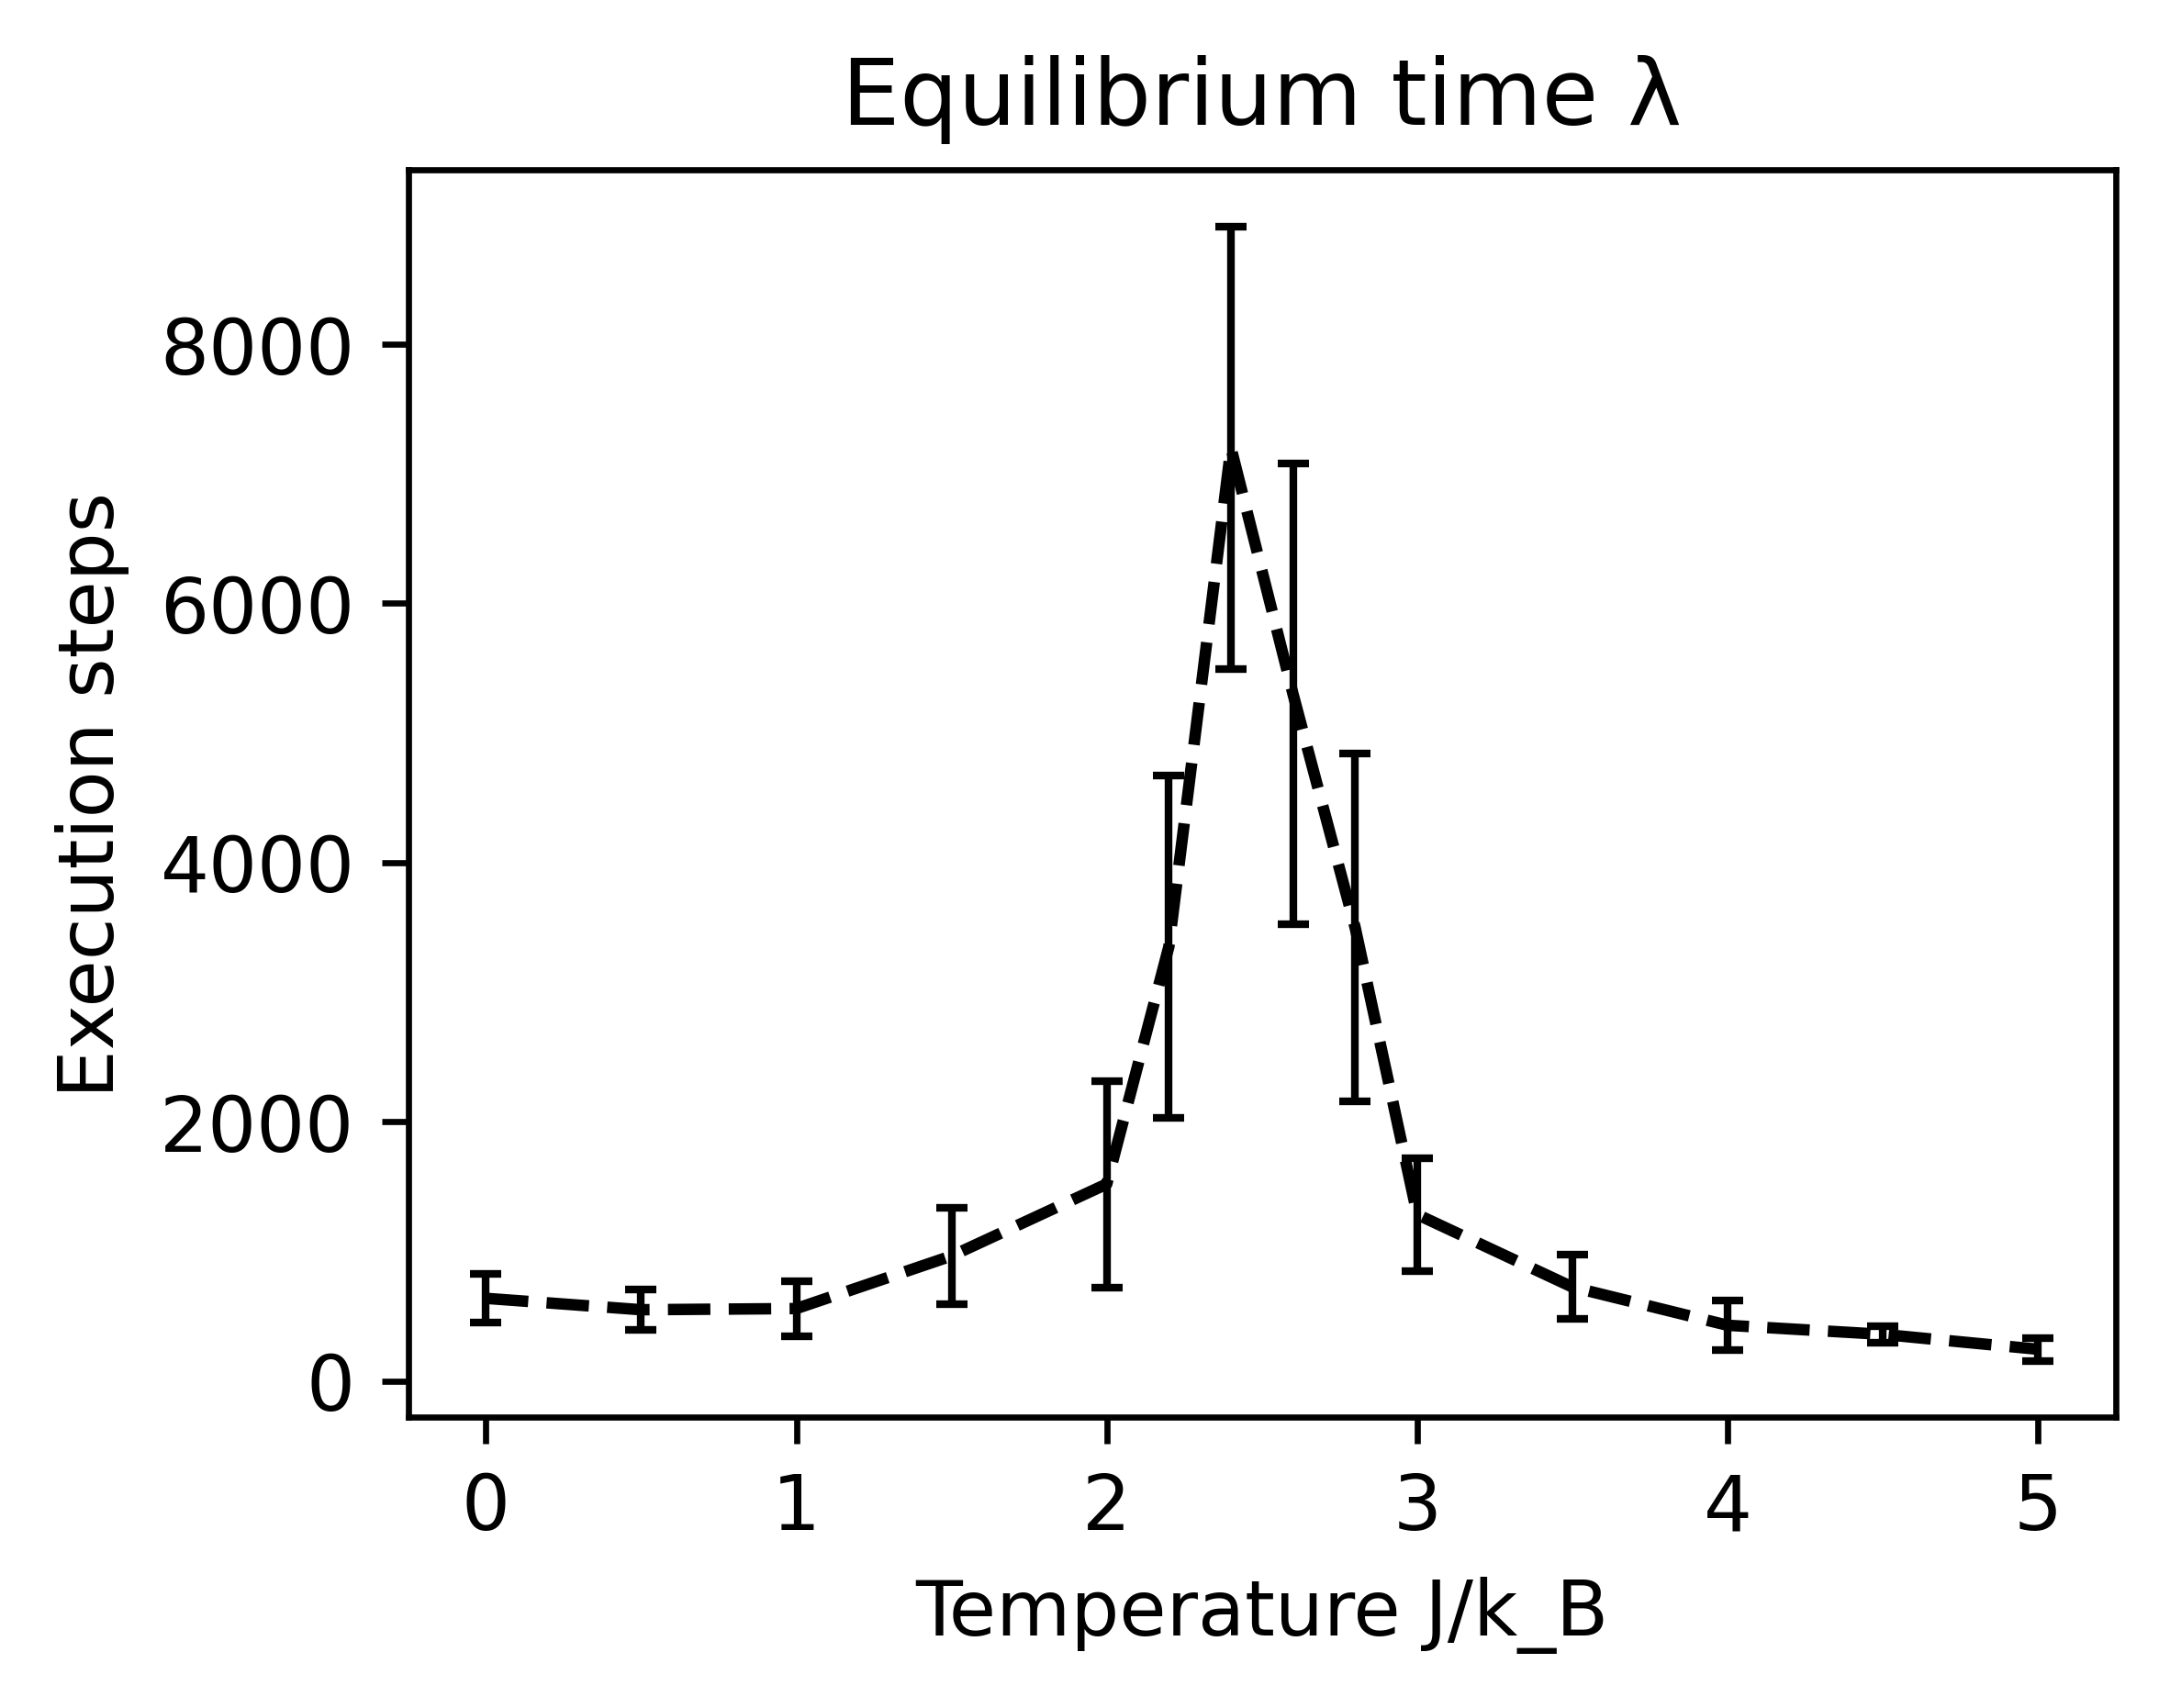

In [ ]:
x=[0,0.5,1,1.5,2,2.2,2.4,2.6,2.8,3,3.5,4,4.5,5]
y=[638,550,559,965,1520,3350,7200,5300,3500,1285,725,430,360,245]
y_err=[186,156,213,370,797,1323,1705,1778,1341,434,248,192,62,88]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)
plt.xlabel("Temperature J/k_B")
plt.ylabel("Execution steps")
plt.title("Equilibrium time ")

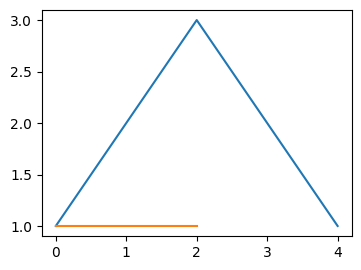

In [ ]:
w=np.correlate([1,1,1],[1,1,1],"full")

plt.plot(w)
plt.plot([1,1,1])

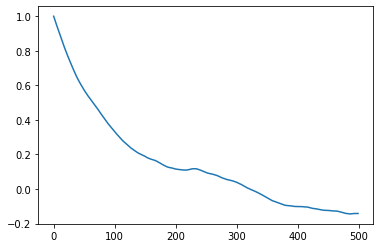

In [ ]:
N=8
spin_config=isling_setup(N)

T=5



m=np.zeros(10000)
M=0
i=0

spin_config=isling_calc(1000,N,T,spin_config)
for i in range(10000):
 
 spin_config=isling_calc(1,N,T,spin_config)
 m[i]=np.mean(spin_config)
M=np.mean(m)
w=np.correlate(m-M,m-M,"full")
#plt.plot(m)
#plt.plot(m-M)
plt.plot(w[10000:10500]/w[10000])
#plt.plot(w)

In [ ]:
N=16


T=1

m=np.zeros(20000)
M=np.zeros(30)
i=0
j=0
for i in range(30):

 spin_config=isling_setup(N)
 spin_config=isling_calc(10000,N,T,spin_config)
 
 for j in range(20000):
  spin_config=isling_calc(1,N,T,spin_config)
  m[j]=np.abs(np.mean(spin_config))
 M[i]=np.mean(m)

mean_m=np.mean(M)
stdev_m=np.std(M)
(mean_m,stdev_m)

#plt.plot(m)
#isling_print_config(spin_config)

(0.7885855989583334, 0.33746361255135504)

Text(0.5, 1.0, 'Finite size scaling')

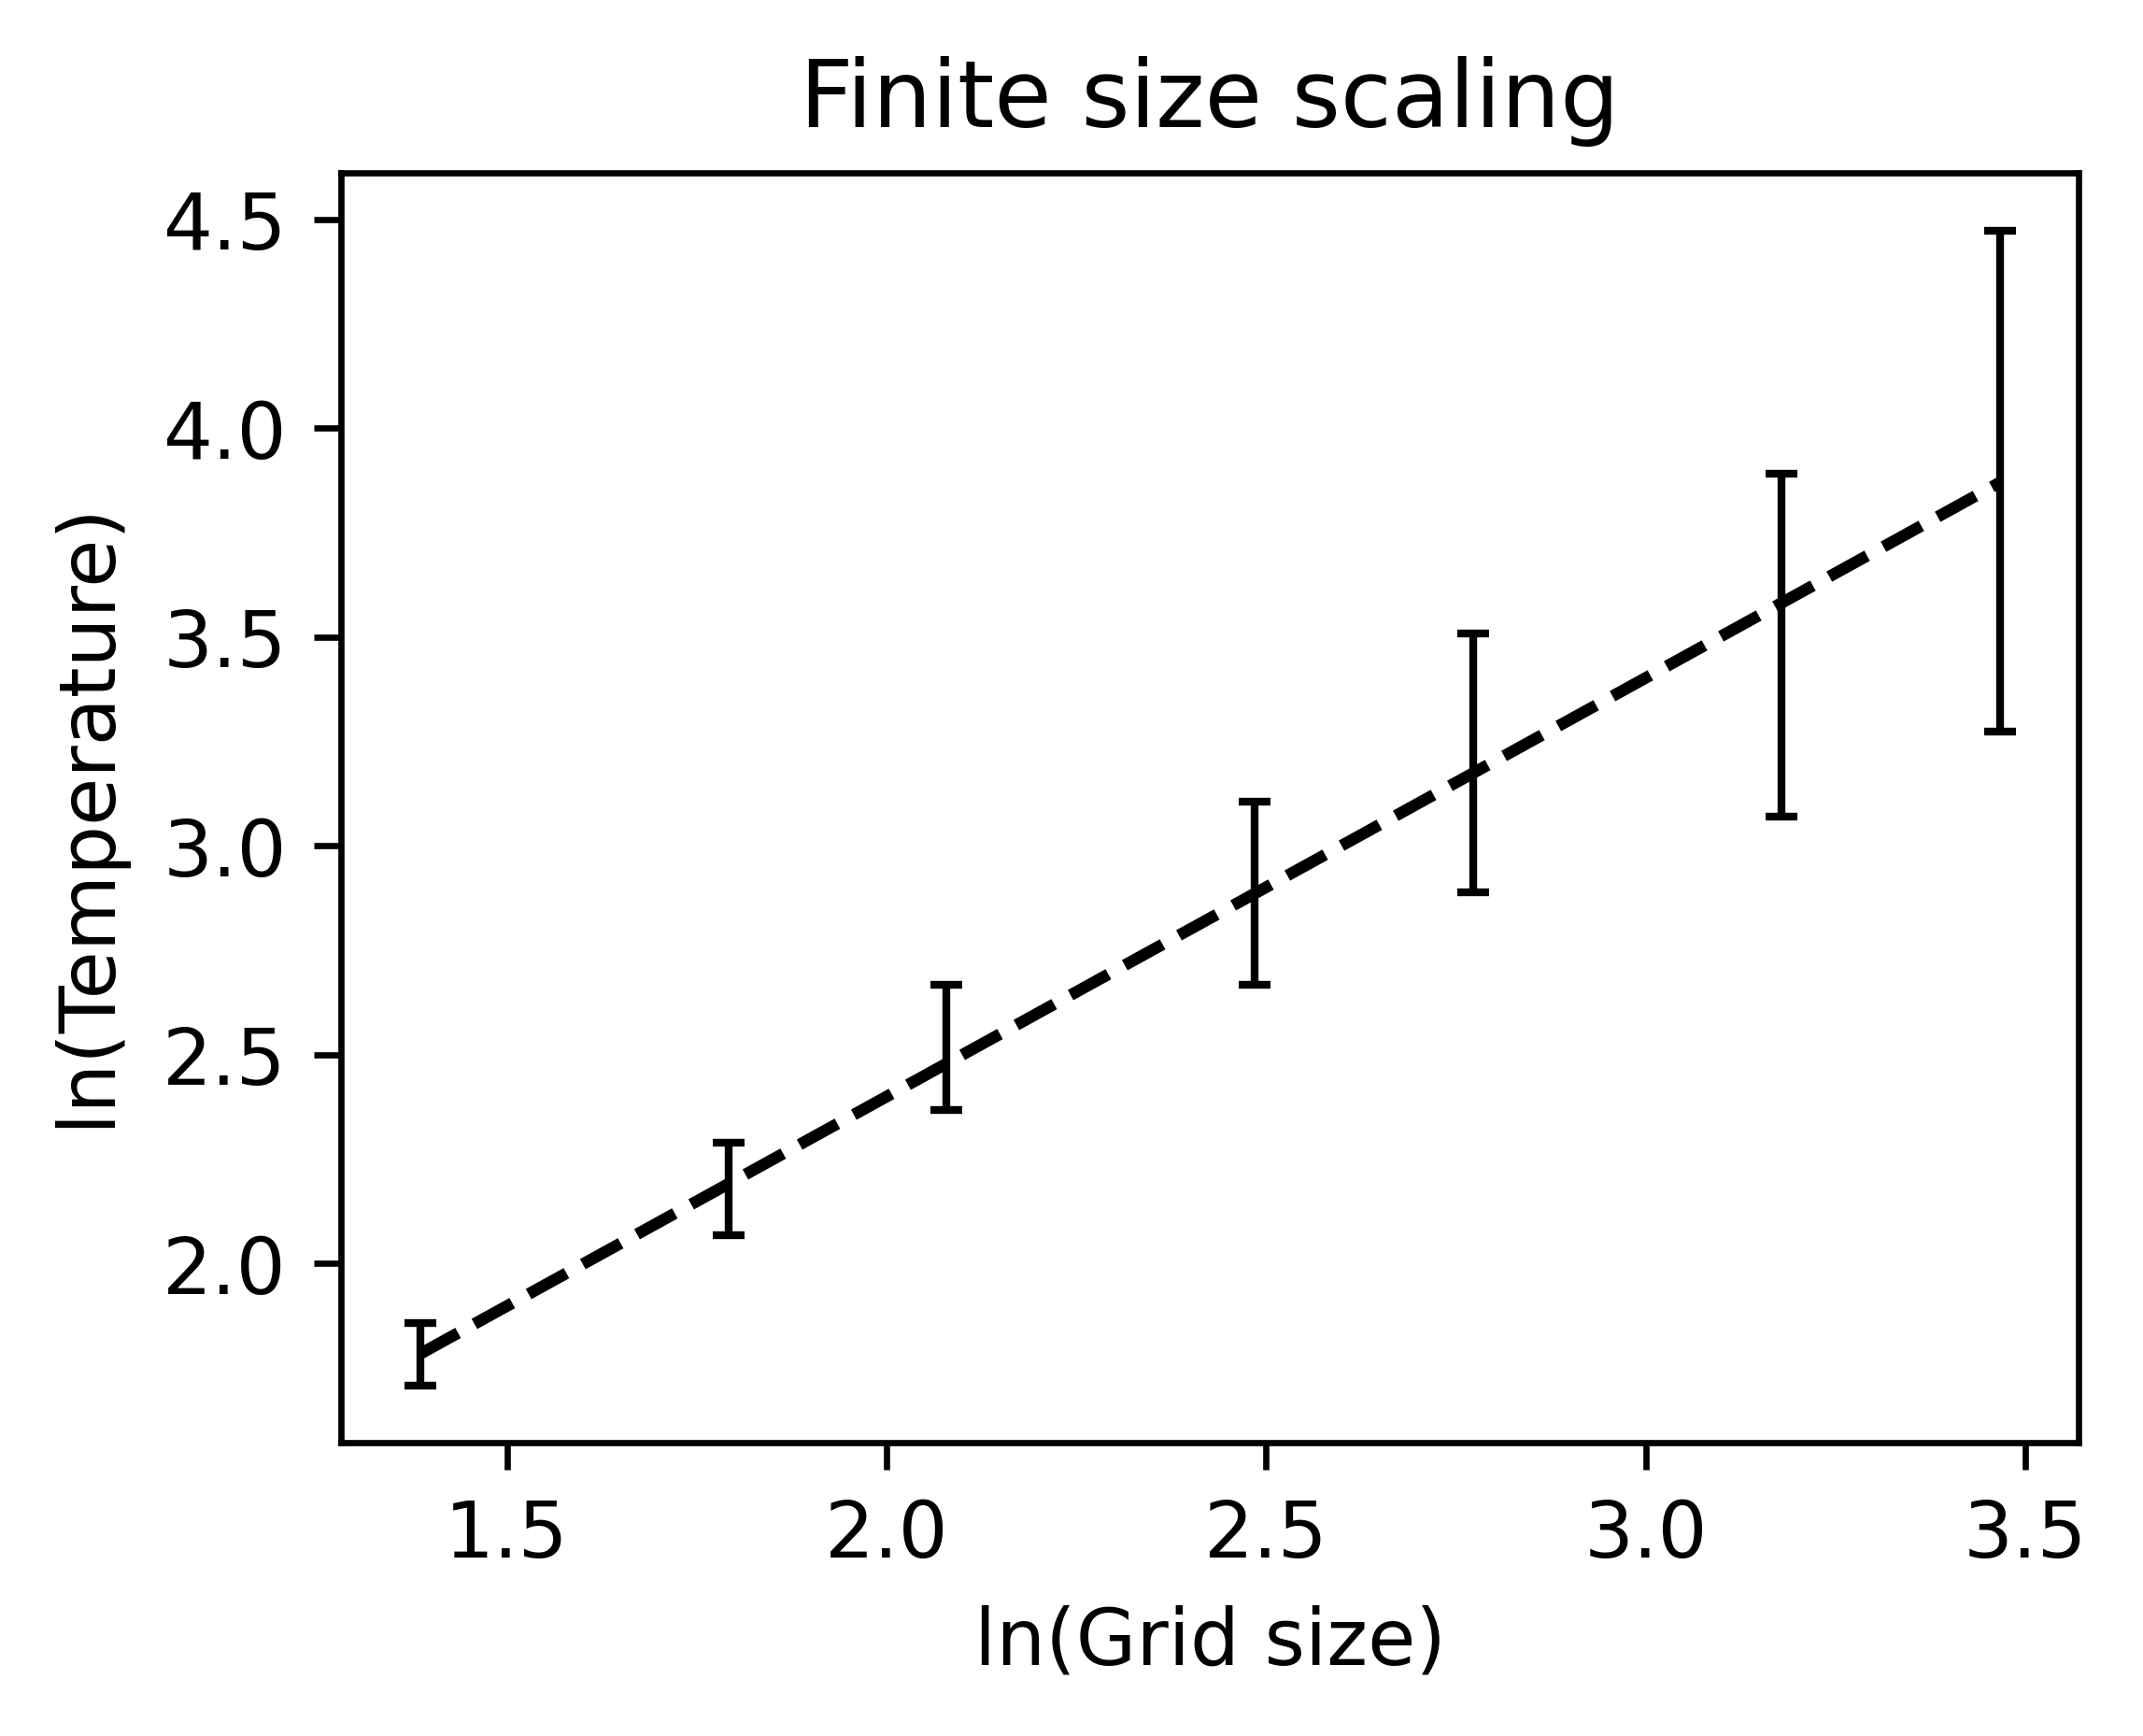

In [ ]:

z=np.zeros(7)
x=np.array([1.386,1.792,2.079,2.485,2.773,3.178,3.466])
y=[1.782,2.178,2.516,2.886,3.199,3.480,3.872]
y_err=[0.074,0.11,0.15,0.22,0.31,0.41,0.6]
z=1.003*x+0.393
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2,linestyle="None")
plt.plot(x,z,linestyle='--',color='k')
plt.xlabel("ln(Grid size)")
plt.ylabel("ln(Temperature) ")
plt.title("Finite size scaling")


Text(0.5, 1.0, 'Critical Temperature')

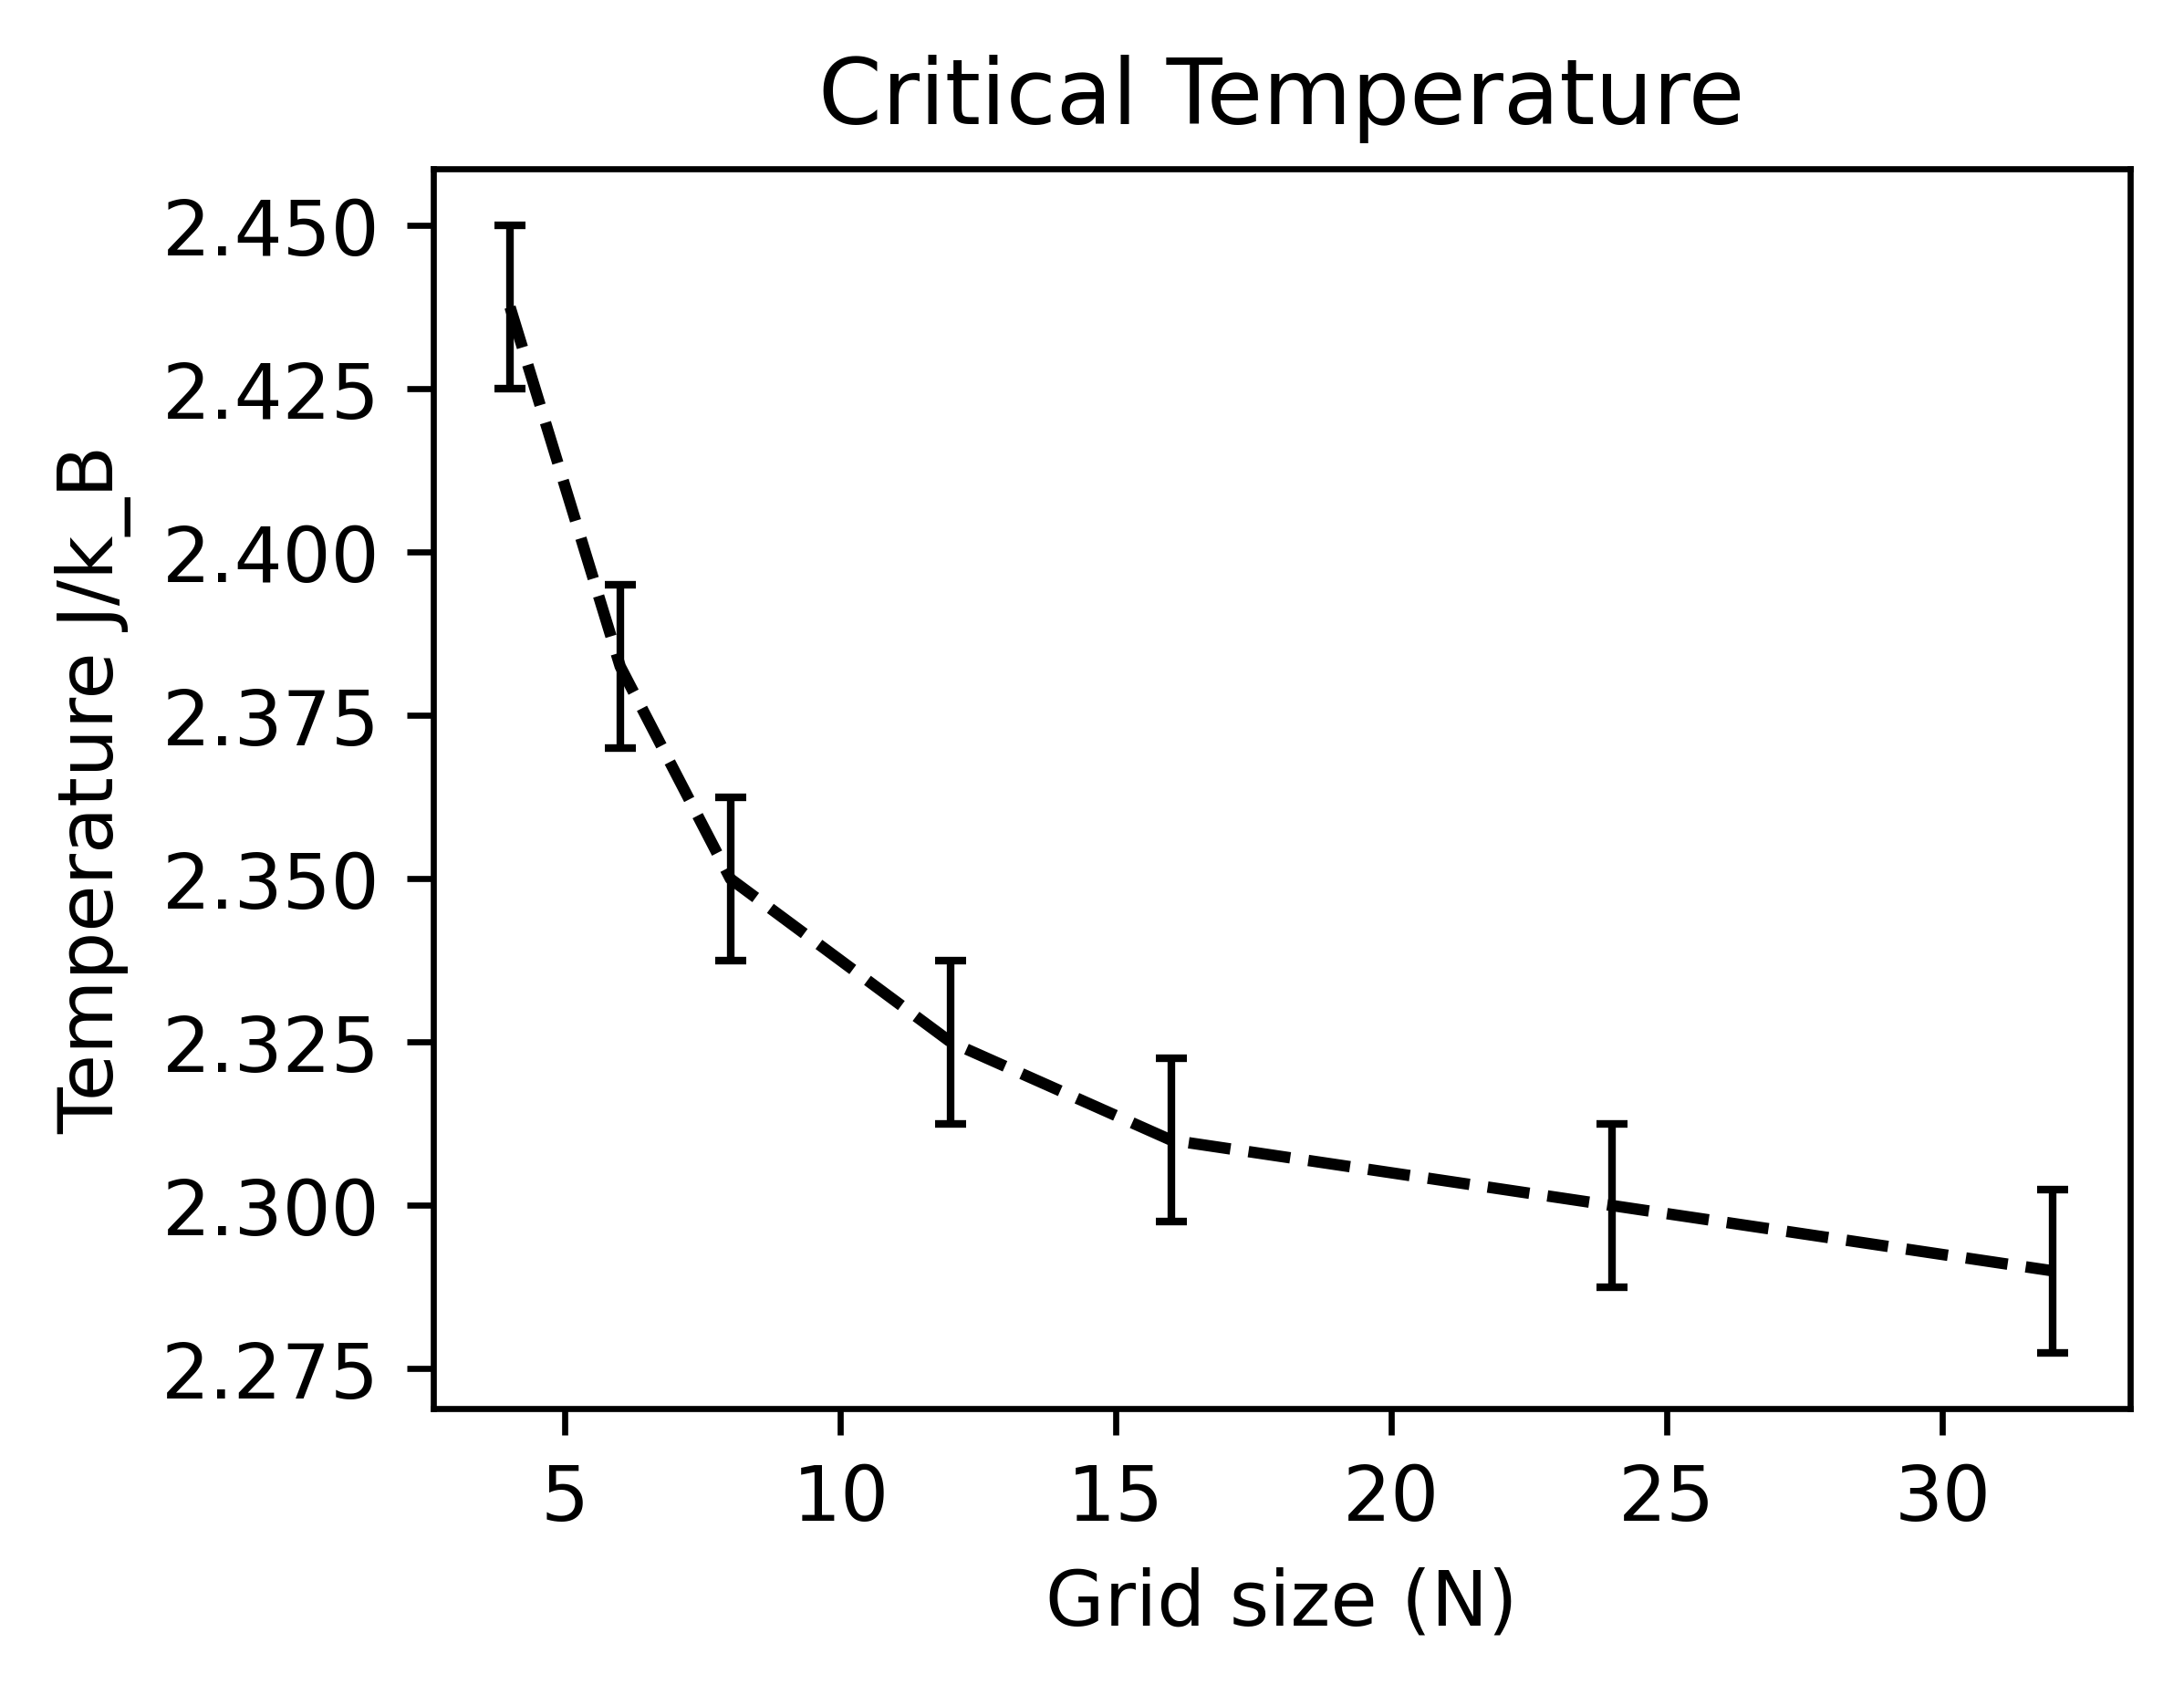

In [ ]:
x=[4,6,8,12,16,24,32]
y=[2.4375,2.3825,2.35,2.325,2.31,2.3,2.29]
y_err=[0.0125,0.0125,0.0125,0.0125,0.0125,0.0125,0.0125]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)
plt.xlabel("Grid size (N)")
plt.ylabel("Temperature J/k_B")
plt.title("Critical Temperature")

Text(0.5, 1.0, 'Average magnetization')

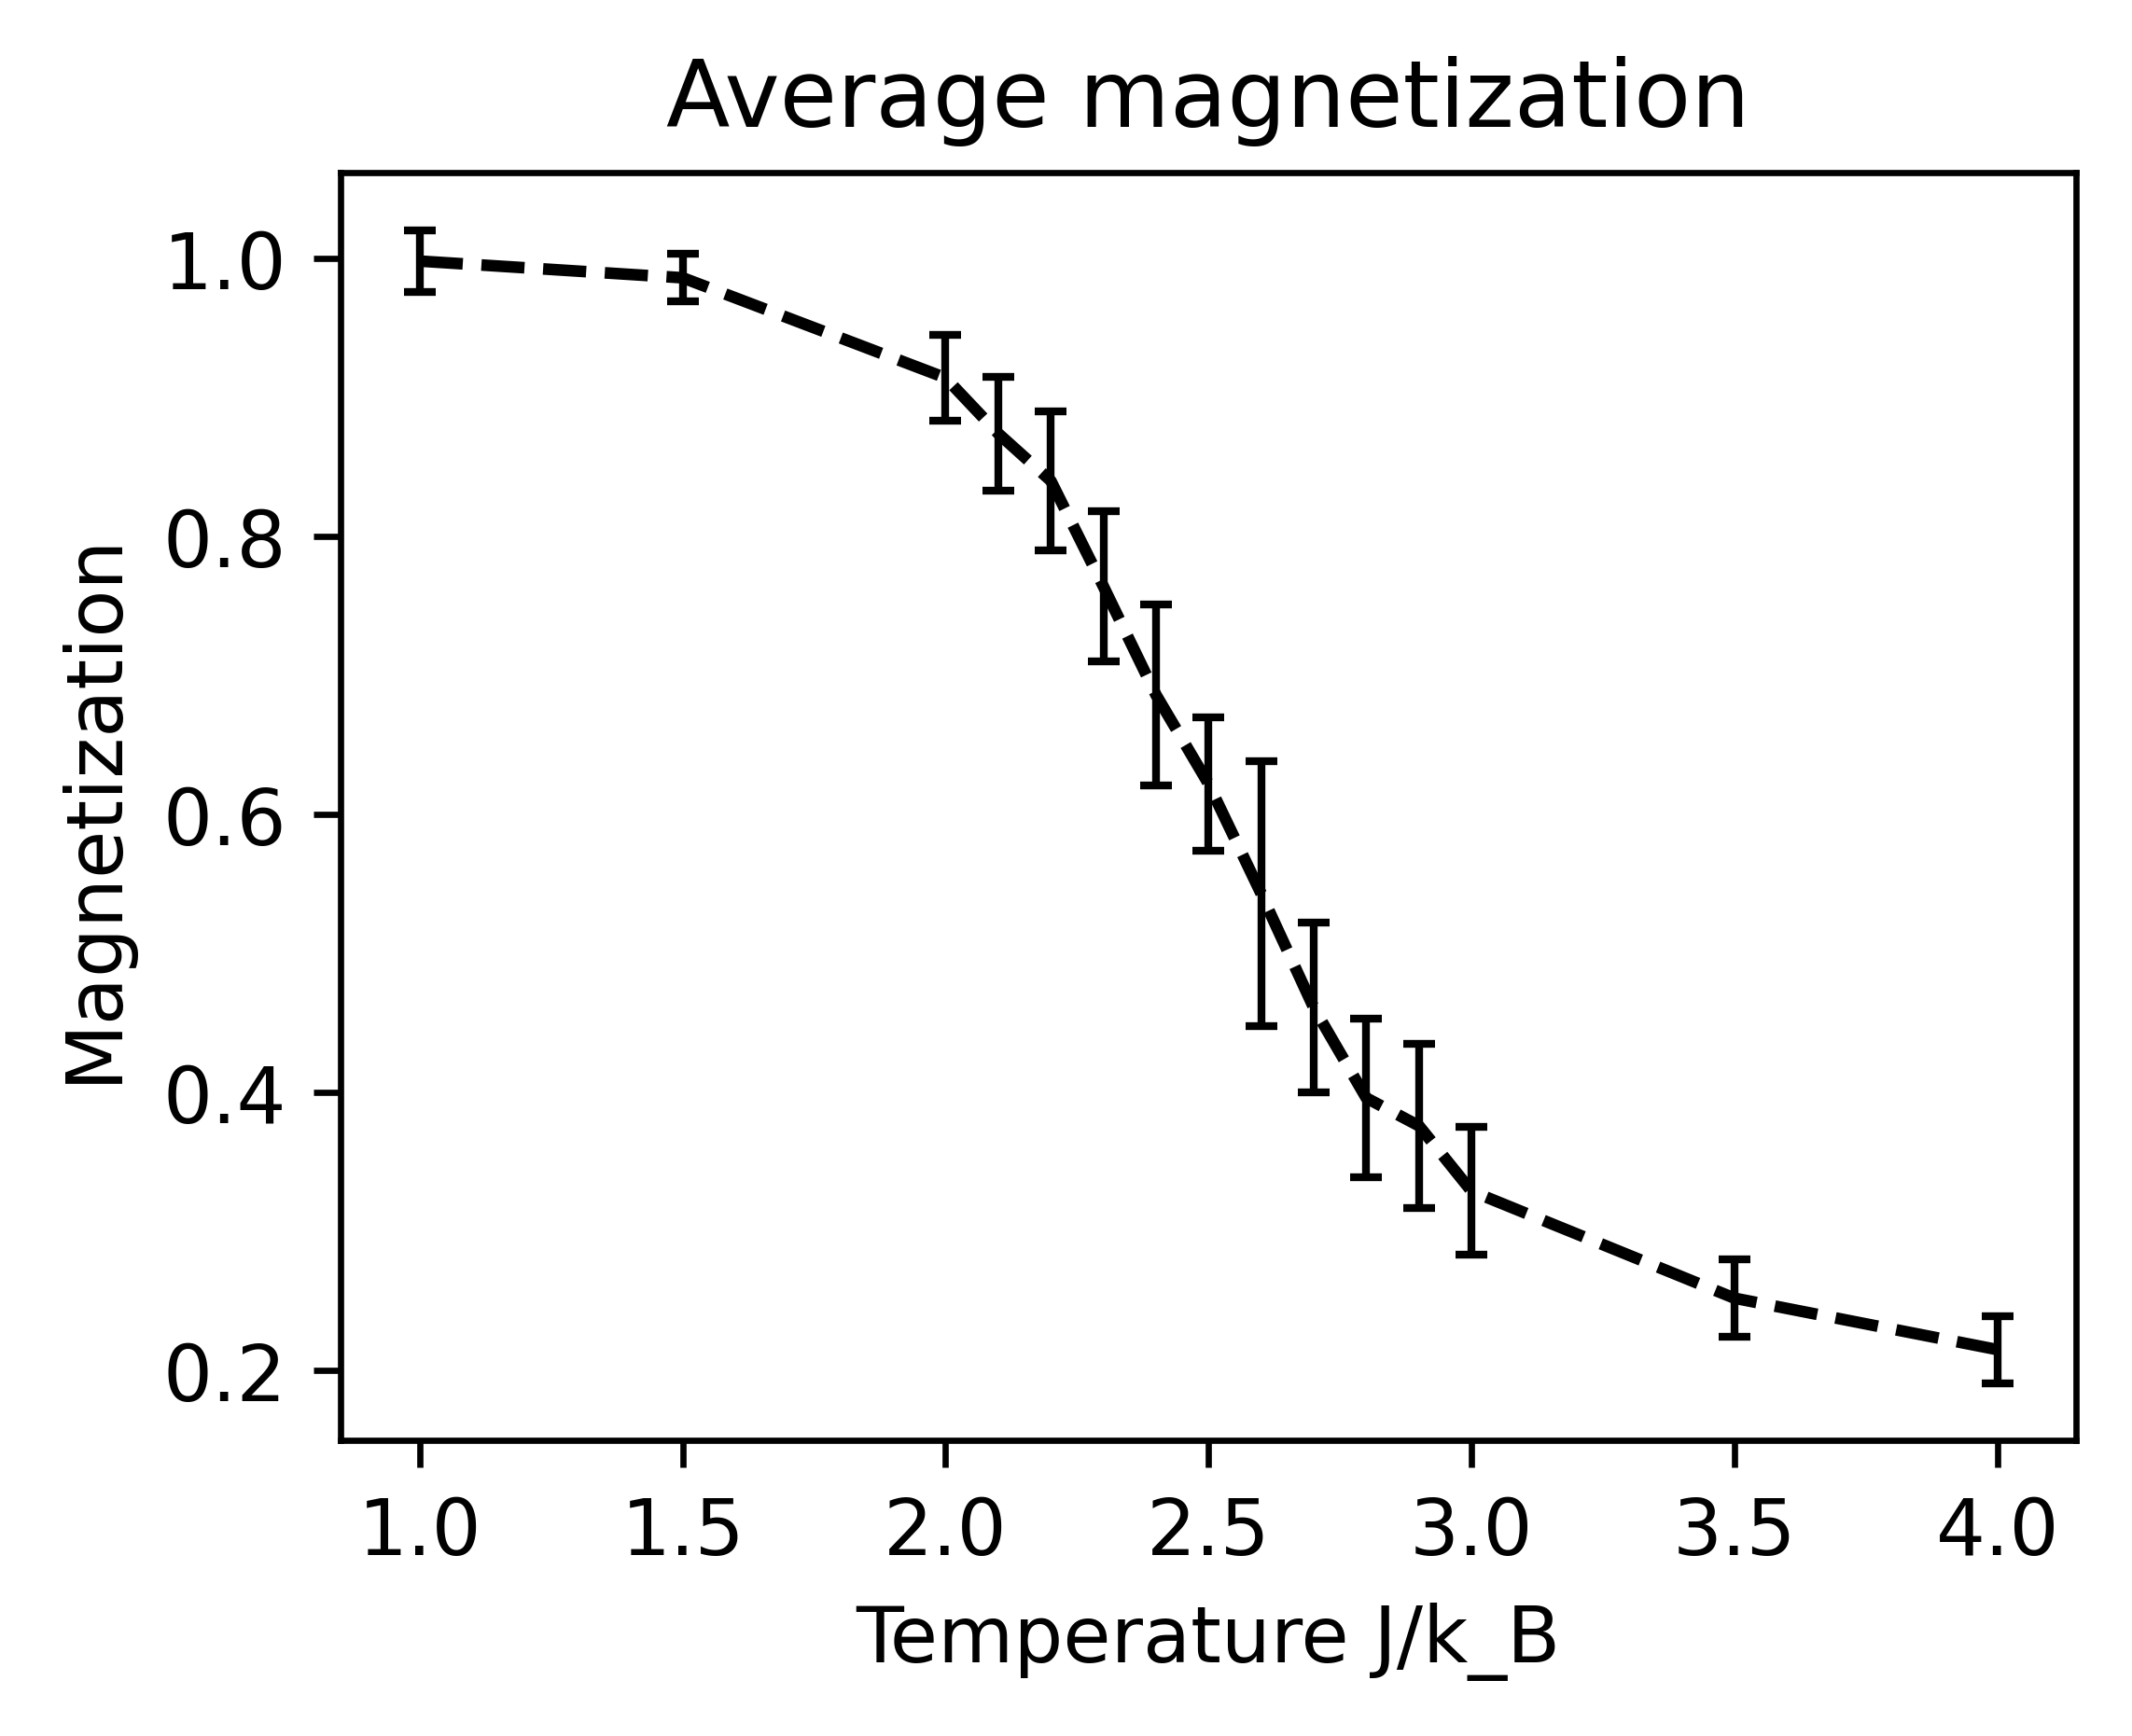

In [ ]:
x=[1,1.5,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.5,4]
y=[0.998,0.986,0.914,0.874,0.840,0.764,0.686,0.622,0.543,0.461,0.396,0.376,0.329,0.252,0.215]
y_err=[0.022,0.017,0.031,0.041,0.05,0.054,0.065,0.048,0.095,0.061,0.057,0.059,0.046,0.028,0.024]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)
plt.xlabel("Grid size")
plt.ylabel("Temperature J/k_B")
plt.title("Average magnetization")

Text(0.5, 1.0, 'Autocorrelation decay time for N=8')

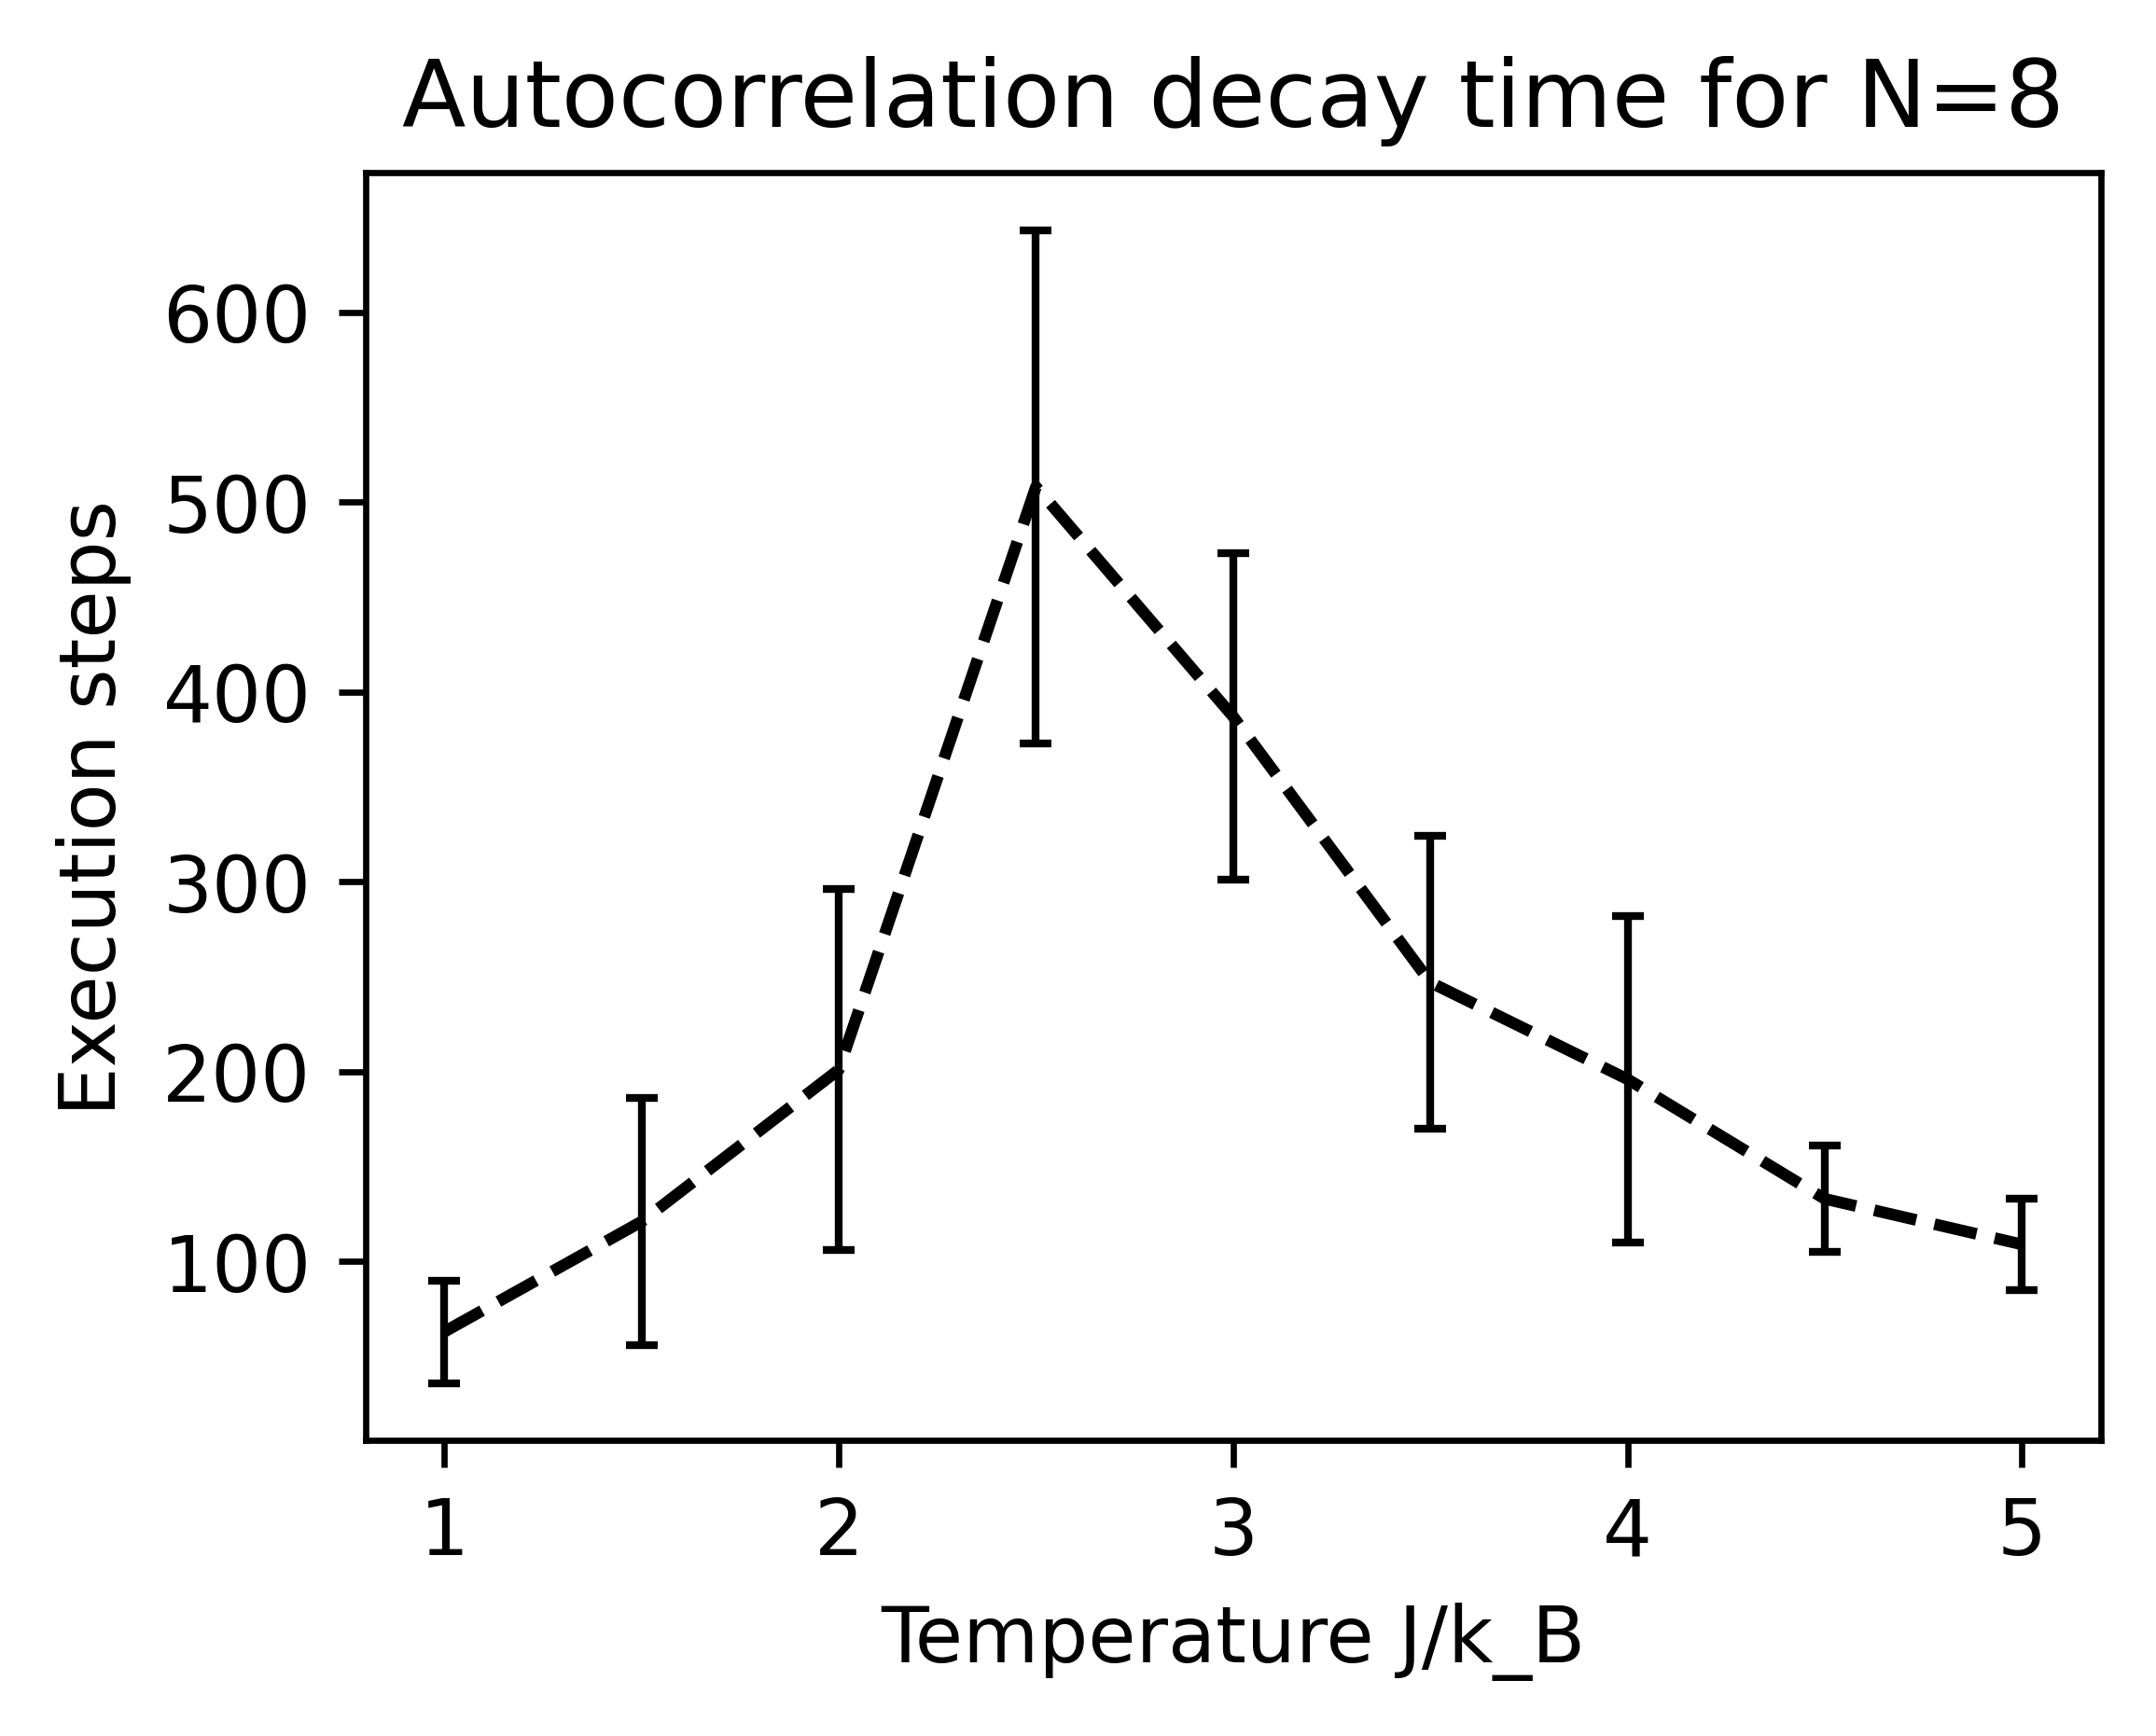

In [ ]:
x=[1,1.5,2,2.5,3,3.5,4,4.5,5]
y=[63,121,201,508,387,247,196,133,109]
y_err=[27,65,95,135,86,77,86,28,24]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)
plt.xlabel("Temperature J/k_B")
plt.ylabel("Execution steps")
plt.title("Autocorrelation decay time for N=8")

Text(0.5, 1.0, 'Autocorrelation decay time for N=16')

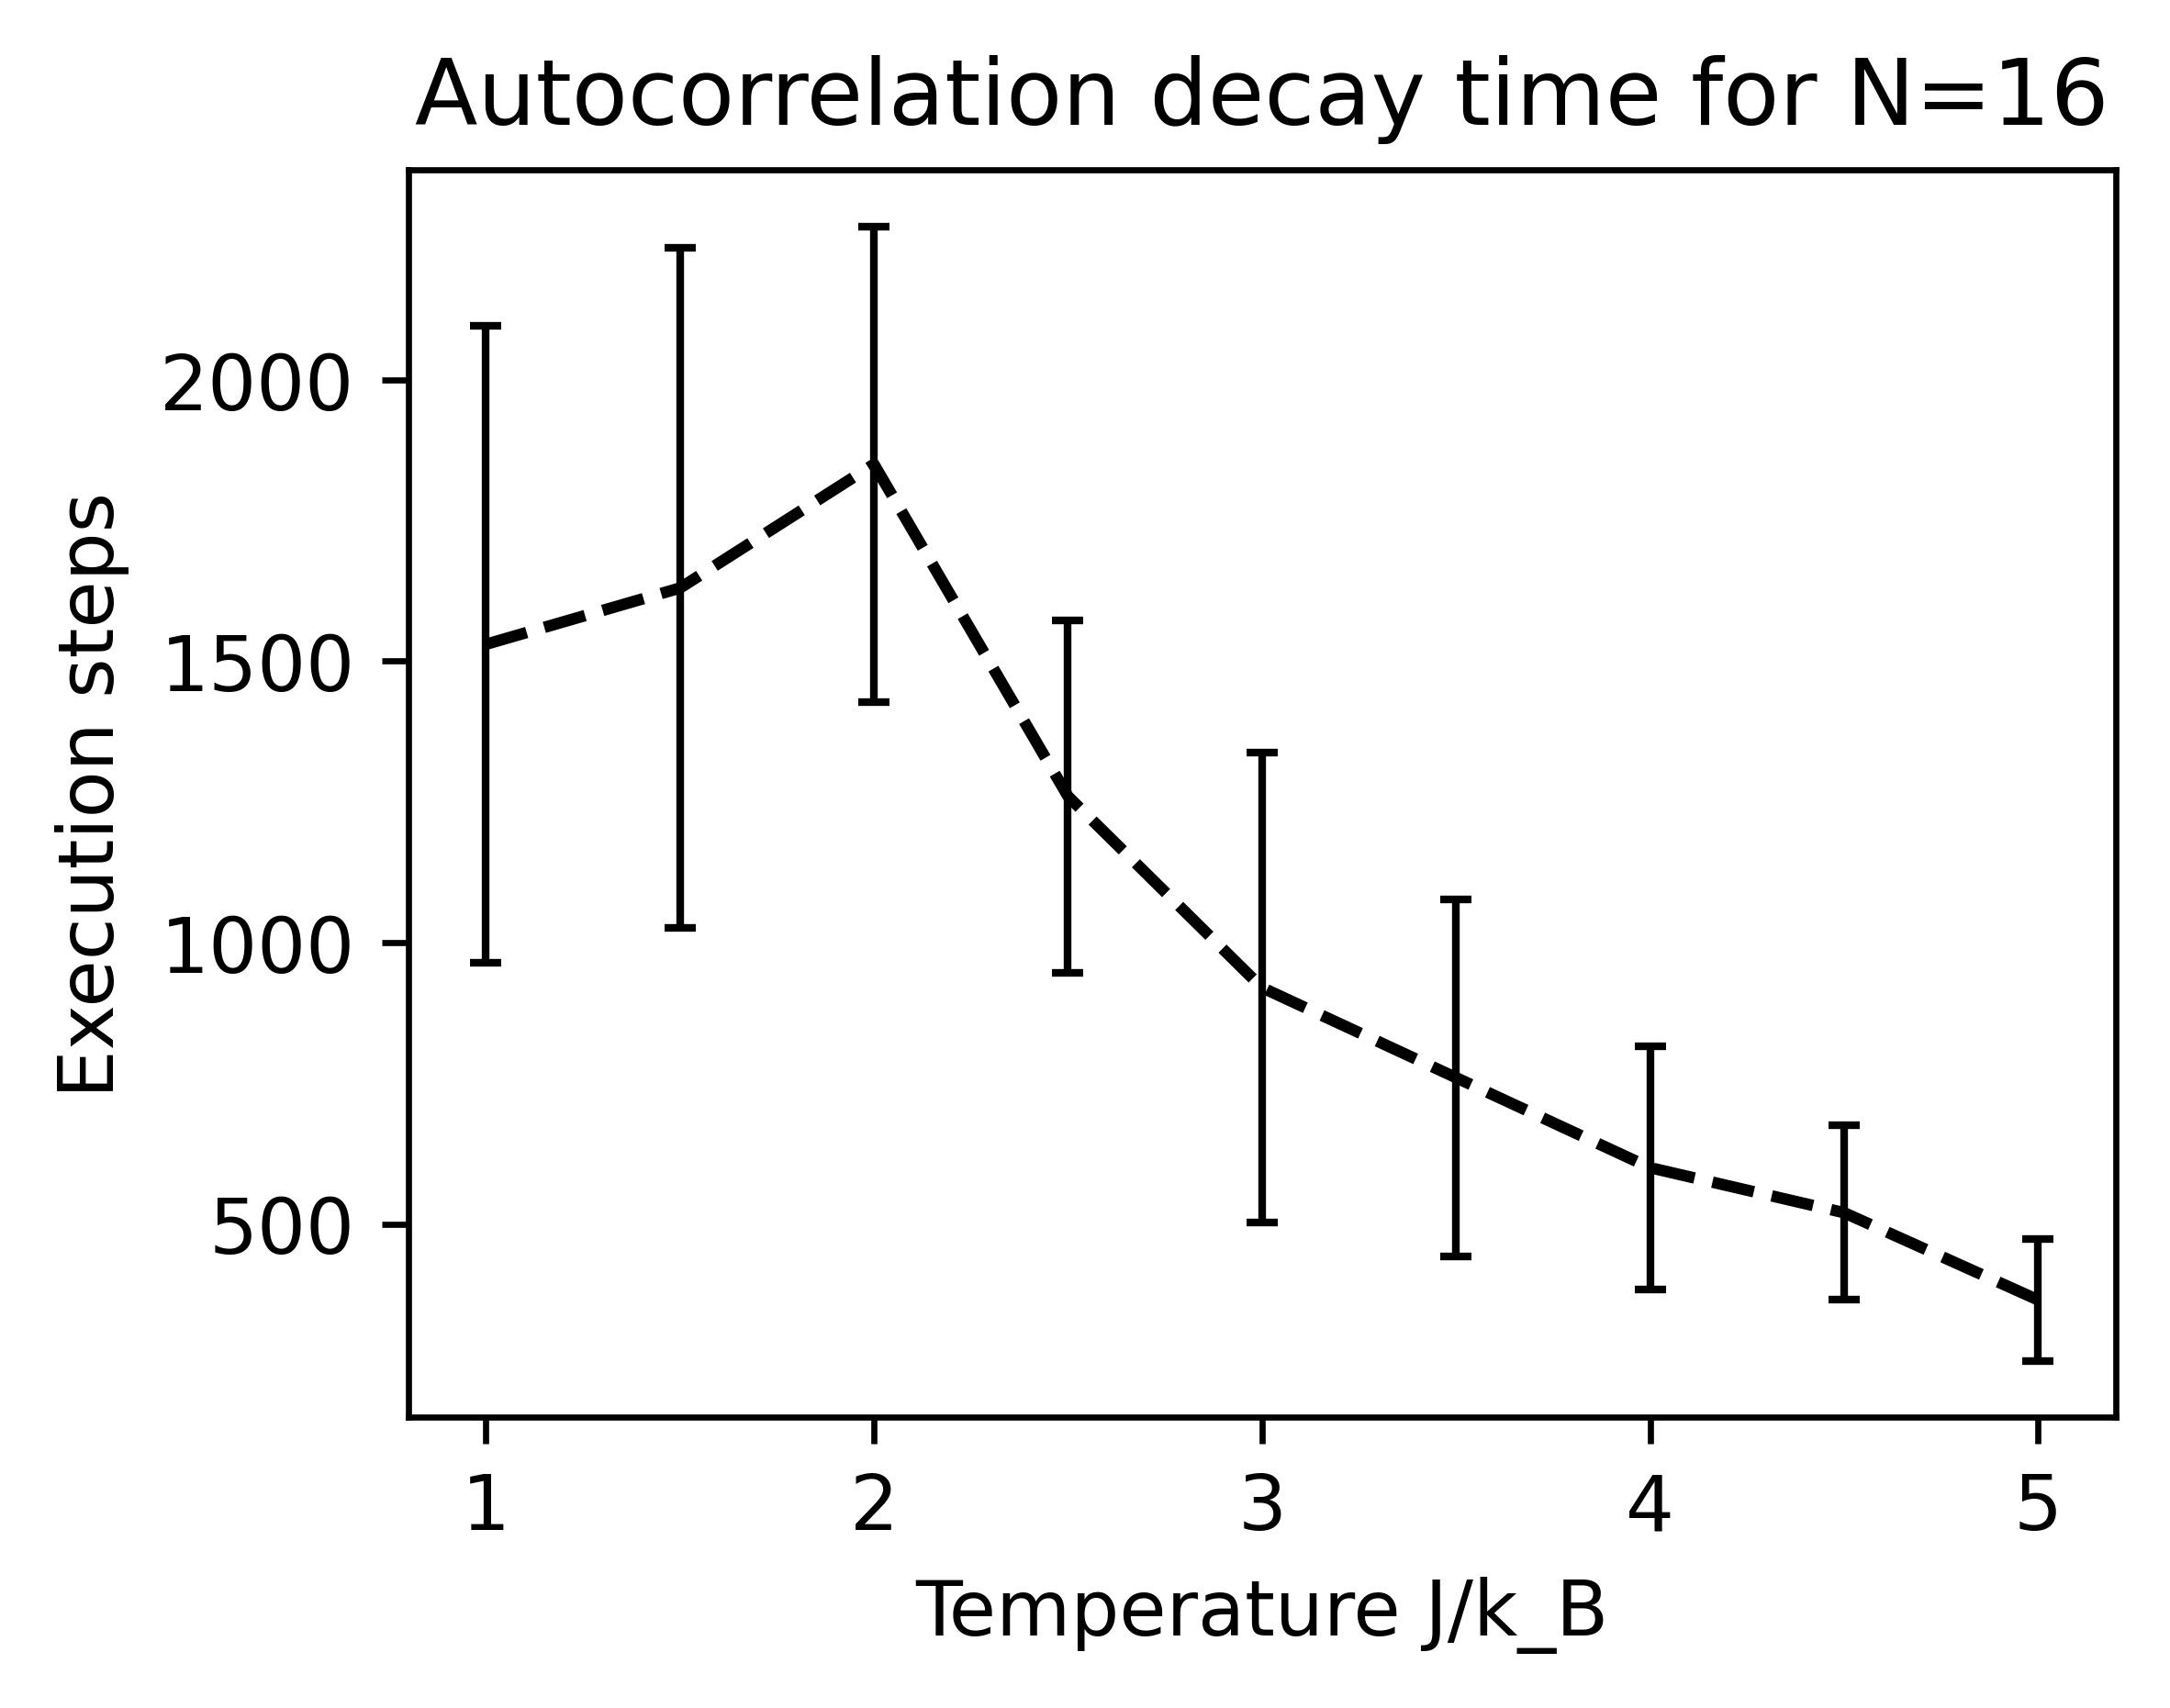

In [ ]:
x=[1,1.5,2,2.5,3,3.5,4,4.5,5]
y=[1530,1630,1850,1260,920,760,600,520,365]
y_err=[566,604,422,313,418,317,216,155,108]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)
plt.xlabel("Temperature J/k_B")
plt.ylabel("Execution steps")
plt.title("Autocorrelation decay time for N=16")

In [ ]:
def isling_energy(M,spin):
  J=1
  E=0.0

  for i in range(M):
   for j in range(M): 
    (x,y)=(i,j)
    positions=[x,y+1,x+1,y,x,y-1,x-1,y]

    check=check_bc(x,y,M)

    if check==False:
     positions=correct_bc(positions,M)
    i=0
    S=0
    
    for i in range(4):
     S=S+spin[positions[2*i]][positions[2*i+1]]
    E=J*S*spin[x][y]+E
   
  return E

In [ ]:
N=4
T=2.45

C=np.zeros(30)

j=0
for j in range(30):
 Energy=np.zeros(5000)
 spin_config=isling_setup(N)
 spin_config=isling_calc(1000,N,T,spin_config)
 i=0
 for i in range(5000):
  spin_config=isling_calc(1,N,T,spin_config)
  Energy[i]=isling_energy(N,spin_config)
#plt.plot(Energy)
 stdev_E=np.std(Energy)
 C[j]=stdev_E**2/T**2
print(C)
mean_C=np.mean(C)
stdev_C=np.std(C)
(mean_C,stdev_C)


[77.0189818  73.18015094 79.59505843 66.24403115 51.3615943  76.45148004
 71.87132761 66.6440115  74.53006237 64.27818593 78.14001977 79.60489186
 65.70041765 63.2089375  70.17061622 85.02132101 76.18021888 85.6910201
 83.86619471 84.54515802 70.52978782 56.8525798  80.64465257 68.81842965
 78.23326681 74.18314038 69.02320822 62.10745925 86.42688203 78.30128889]


(73.28081250678882, 8.586475191917922)

In [ ]:
x=[2,2.1,2.2]
y=[514,]
y_err=[192,]
plt.errorbar(x,y,yerr=y_err,fmt='--k',elinewidth=1,capsize=2)

719.2308956472891


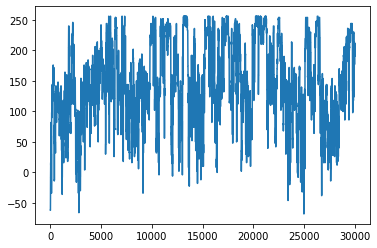

In [ ]:
N=8

T=2.5




Energy=np.zeros(30000)
spin_config=isling_setup(N)
#spin_config=isling_calc(5000,N,T,spin_config)
i=0
for i in range(30000):
 spin_config=isling_calc(1,N,T,spin_config)
 Energy[i]=isling_energy(N,spin_config)
plt.plot(Energy)
 
stdev_E=np.std(Energy)
C=stdev_E**2/T**2
print(C)


In [ ]:
def isling_calc_energy(steps,M,Temp,spin,E):
  J=1
  k_b=1

  for k in range(steps):
   (x,y)=np.random.randint(M,size=2)
   positions=[x,y+1,x+1,y,x,y-1,x-1,y]

   check=check_bc(x,y,M)

   if check==False:
    positions=correct_bc(positions,M)
   i=0
   S=0
   Delta_E=0.0
   for i in range(4):
    S=S+spin[positions[2*i]][positions[2*i+1]]
   Delta_E=2*J*S*spin[x][y] 
   p=np.random.rand(1)
   if Delta_E<0 or np.exp(-Delta_E/(k_b*Temp))>p:
    spin[x][y]=-1*spin[x][y]
    E=E+Delta_E
  return spin,E

408.66870021910285


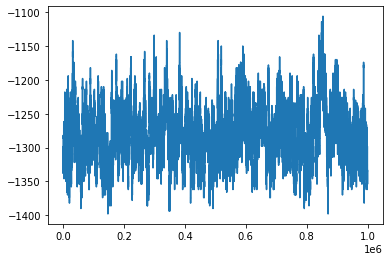

In [ ]:
N=24

T=2




Energy=np.zeros(1000001)
spin_config=isling_setup(N)
Energy[0]=isling_energy(N,spin_config)
spin_config,Energy[0]=isling_calc_energy(300000,N,T,spin_config,Energy[0])
i=0
for i in range(1000000):
 spin_config,Energy[i+1]=isling_calc_energy(1,N,T,spin_config,Energy[i])
 
plt.plot(Energy)
 
stdev_E=np.std(Energy)
C=stdev_E**2/T**2
print(C)

In [ ]:
N=6
T=2.3875



C=np.zeros(30)

j=0
for j in range(30):
 Energy=np.zeros(100001)
 spin_config=isling_setup(N)
 Energy[0]=isling_energy(N,spin_config)
 
 spin_config,Energy[0]=isling_calc_energy(5000,N,T,spin_config,Energy[0])
 i=0
 for i in range(100000):
  spin_config,Energy[i+1]=isling_calc_energy(1,N,T,spin_config,Energy[i])
  

 stdev_E=np.std(Energy)
 C[j]=stdev_E**2/T**2
print(C)
mean_C=np.mean(C)
stdev_C=np.std(C)
(mean_C,stdev_C)

[38.28531603 36.39485808 39.83199338 34.88748064 39.21236956 37.16642162
 35.86814898 38.47646248 35.97625267 32.22371179 35.24166152 36.93953189
 36.48945725 37.25021265 36.8474411  37.63601876 36.64221009 35.51108246
 38.77838358 36.56570406 38.40854471 37.61660344 38.71128951 37.81771051
 37.93974605 35.64747151 38.05849251 35.71905093 37.64199458 36.59741459]


(37.01276789757069, 1.5087794110645736)